# Primeiro, olhe nosso conjunto de dados

Neste notebook, veremos as etapas necessárias exigidas antes de qualquer
o aprendizado de máquina ocorre. Envolve:

* carregando os dados;
* olhando para as variáveis no conjunto de dados, em particular, diferenciar
  entre variáveis numéricas e categóricas, que precisam de diferentes
  pré-processamento na maioria dos fluxos de trabalho de aprendizado de máquina;
* visualizar a distribuição das variáveis para obter alguns insights sobre
  o conjunto de dados.

## Loading the adult census dataset

Usaremos dados do censo dos Estados Unidos de 1994 que baixamos de
[OpenML](http://openml.org/).

O conjunto de dados está disponível como um arquivo CSV (Comma-Separated Values) e nós iremos
use pandas para lê-lo.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"><a class="reference external" href="https://pandas.pydata.org/">Pandas</a> é uma biblioteca Python usada para
manipulação de dados estruturados em 1 e 2 dimensões. Se você nunca usou
pandas, recomendamos que você olhe para isso
<a class="reference external" href="https://pandas.pydata.org/docs/user_guide/10min.html">tutorial</a>.</p>
</div>

In [1]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv") 

O objetivo com esses dados é prever se uma pessoa ganha mais de 50 mil por ano com dados heterogêneos, como idade, emprego, educação, informações familiares, etc.

## As variáveis (colunas) no conjunto de dados

Os dados são armazenados em um dataframe do pandas. Um dataframe é um tipo de
dados estruturados compostos por 2 dimensões. Este tipo de dado também é referido
como dados tabulares.

Cada linha representa uma amostra. No campo do aprendizado de máquina ou descritivo
estatísticas, os termos equivalentes comumente usados são "registro", "instância" ou
"observação".

Cada coluna representa um tipo de informação que foi coletada e é
chamado de recurso. No campo do aprendizado de máquina e descritivo
estatísticas, os termos equivalentes comumente usados são "variável", "atributo" ou
"covariável".

Uma maneira rápida de inspecionar o dataframe é mostrar as primeiras linhas com o
método `head`:

In [2]:
adult_census.head()

,ID,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_census = adult_census.drop(columns=['ID'])
adult_census.head()

,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


A coluna denominada class é nossa variável de destino (ou seja, a variável que desejamos prever). As duas classes possíveis são <= 50K (receita baixa) e> 50K (receita alta). O problema de previsão resultante é, portanto, um problema de classificação binária, enquanto usaremos as outras colunas como variáveis ​​de entrada para nosso modelo.

In [4]:
target_column = 'class'
adult_census[target_column].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>As aulas são ligeiramente desequilibradas, o que significa que há mais amostras de uma ou
mais classes em comparação com outras. O desequilíbrio de classes acontece frequentemente na prática
e pode precisar de técnicas especiais ao construir um modelo preditivo.</p>
<p class="last">Por exemplo, em um ambiente médico, se estamos tentando prever se
indivíduos desenvolverão uma doença rara, haverá muito mais
assuntos do que assuntos doentes no conjunto de dados.</p>
</div>

O conjunto de dados contém dados numéricos e categóricos. Valores numéricos
assumir valores contínuos, por exemplo `age`. Os valores categóricos podem ter um
número finito de valores, por exemplo `native-country`

In [5]:
print(adult_census.columns.tolist())

['age', 'workclass', 'fnlwgt:', 'education:', 'education-num:', 'marital-status:', 'occupation:', 'relationship:', 'race:', 'sex:', 'capital-gain:', 'capital-loss:', 'hours-per-week:', 'native-country:', 'class']


In [6]:
numerical_columns = [
    'age', 'education-num:', 'capital-gain:', 'capital-loss:',
    'hours-per-week:']
categorical_columns = [
    'workclass', 'education:', 'marital-status:', 'occupation:',
    'relationship:', 'race:', 'sex:', 'native-country:']
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

Podemos verificar o número de amostras e o número de colunas disponíveis em
o conjunto de dados:

In [7]:
print(f"The dataset contains {adult_census.shape[0]} samples and "
      f"{adult_census.shape[1]} columns")

The dataset contains 32561 samples and 14 columns


Podemos calcular o número de recursos contando o número de colunas e
subtraia 1, pois uma das colunas é o destino.

In [8]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


## Inspeção visual dos dados
Antes de construir um modelo preditivo, é uma boa ideia olhar os dados:

* talvez a tarefa que você está tentando realizar possa ser resolvida sem aprendendo máquina;
* você precisa verificar se as informações necessárias para a sua tarefa são realmente
  presente no conjunto de dados;
* inspecionar os dados é uma boa maneira de encontrar peculiaridades. Estes podem
  surgem durante a coleta de dados (por exemplo, sensor com defeito ou ausente
  valores), ou da forma como os dados são processados posteriormente (por exemplo
  valores limitados).

Vejamos a distribuição de recursos individuais para obter alguns insights
sobre os dados. Podemos começar plotando histogramas, observe que isso apenas
funciona para recursos que contêm valores numéricos:

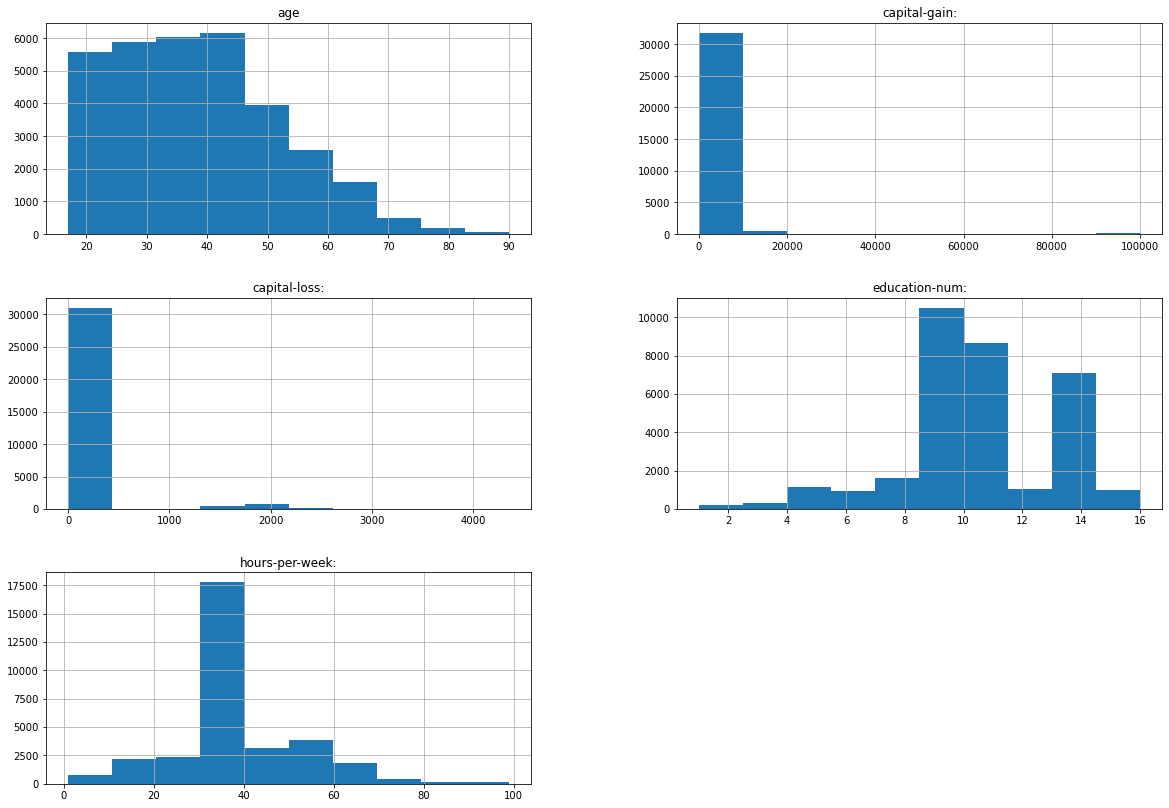

In [9]:
_ = adult_census.hist(figsize=(20, 14))

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Na célula anterior, usamos o seguinte padrão: <tt class="docutils literal">_ = func()</tt>. Nós fazemos isso
para evitar mostrar a saída de <tt class="docutils literal">func()</tt> que neste caso isso não é 
útil. Na verdade, atribuímos a saída de <tt class="docutils literal">func()</tt> na variável <tt class="docutils literal">_</tt>
(called underscore). Por convenção, em Python, a variável de sublinhado é usada
como uma variável "garbage" (lixo) para armazenar resultados nos quais não estamos interessados.</p>
</div>

Já podemos fazer alguns comentários sobre algumas das variáveis:

* `age`: não há muitos pontos para` age > 70`. O conjunto de dados
  a descrição indica que aposentados foram filtrados
  (`hours-per-week > 0`);
* `education-num`: pico em 10 e 13, difícil dizer a que corresponde
  sem olhar muito mais longe. Faremos isso mais tarde neste caderno;
* O pico de `hours-per-week` chega a 40, este era muito provavelmente o número padrão de
  horário de trabalho no momento da coleta de dados;
* a maioria dos valores de `capital-gain` e` capital-loss` são próximos de zero.


Para variáveis categóricas, podemos olhar para a distribuição de valore

In [27]:
adult_census['sex:'].value_counts()

Male      21790
Female    10771
Name: sex:, dtype: int64

In [29]:
adult_census['education:'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education:, dtype: int64

Conforme observado acima, a distribuição `education-num` tem dois picos claros em torno de 10
e 13. Seria razoável esperar que `education-num` seja o número
de anos de educação.

Vejamos a relação entre `education` e `education-num`.

In [31]:
pd.crosstab(index=adult_census['education:'],
            columns=adult_census['education-num:'])

education-num:,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education:,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


Isso mostra que `education` e `education-num` dão a você o mesmo
em formação. Por exemplo, `education-num = 2` é equivalente a
`education = '1ª-4ª'`. Na prática, isso significa que podemos remover `education-num`
sem perder informações. Observe que ter redundantes (ou altamente correlacionadas)
colunas podem ser um problema para algoritmos de aprendizado de máquina.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Nos próximos cadernos, vamos manter apenas o <tt class="docutils literal">education</tt> variável,
excluindo o <tt class="docutils literal"><span class="pre">education-num</span></tt> 
variável, uma vez que o último é redundante com o
antigo.</p>
</div>

Outra maneira de inspecionar os dados é fazer um `pairplot` e mostrar como cada
variável difere de acordo com nosso alvo, ou seja, `classe`. Parcela ao longo do
diagonal mostra a distribuição de variáveis individuais para cada `classe`. O
plotagens fora da diagonal podem revelar interações interessantes entre
variáveis.

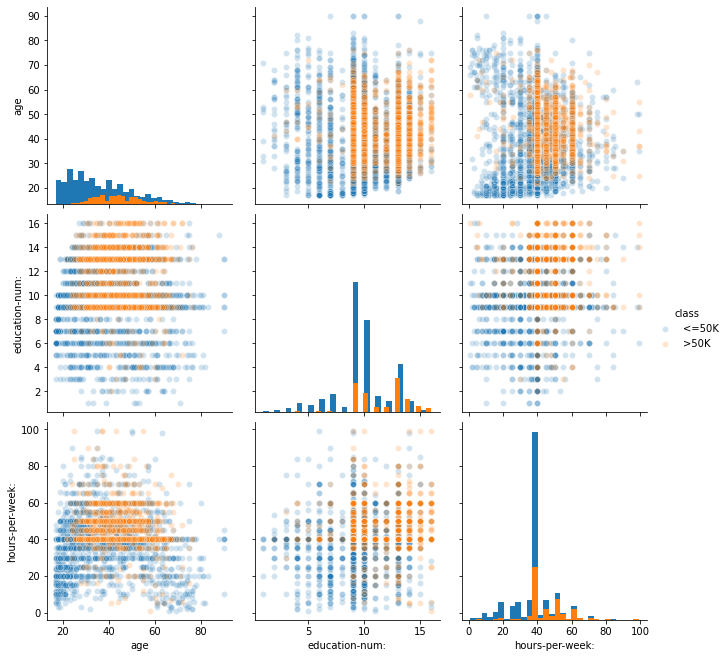

In [34]:
import seaborn as sns

# Vamos representar graficamente um subconjunto de dados para manter o gráfico legível e tornar o
# plotting mais rápido
n_samples_to_plot = 5000
columns = ['age', 'education-num:', 'hours-per-week:']
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

## Criando regras de decisão manualmente

Olhando para os gráficos anteriores, poderíamos criar algumas regras escritas à mão
que prevê se alguém tem uma renda alta ou baixa. Por exemplo, nós
poderia se concentrar na combinação dos recursos `hours-per-week` e `age`.

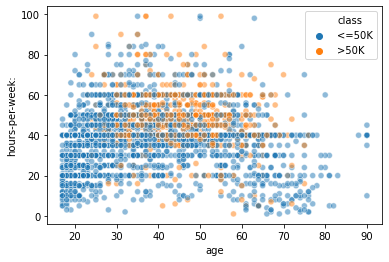

In [37]:
_ = sns.scatterplot(
    x="age", y="hours-per-week:", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,)

Os pontos de dados (círculos) mostram a distribuição de `hours-per-week` e `age`
no conjunto de dados. Os pontos azuis significam baixa renda e os pontos laranja significam
alta renda. Esta parte do gráfico é igual ao gráfico inferior esquerdo em
o par acima.

Neste gráfico, podemos tentar encontrar regiões que contêm principalmente uma única classe
de forma que podemos facilmente decidir que classe devemos prever. Poderíamos vir
com regras escritas à mão, conforme mostrado neste gráfico:

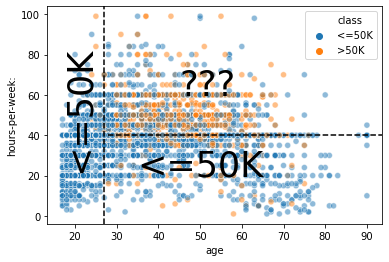

In [38]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age", y="hours-per-week:", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

* Na região `age <27` (região esquerda) a previsão é de baixa renda.
  Na verdade, existem muitos pontos azuis e não podemos ver nenhum ponto laranja.
* Na região `age > 27 AND hours-per-week < 40`
  (região inferior direita), a previsão é de baixa renda. Na verdade, existem
  muitos pontos azuis e apenas alguns pontos laranja.
* Na região `age > 27 AND hours-per-week > 40` (região superior direita),
  vemos uma mistura de pontos azuis e laranja. Parece complicado para
  escolheu qual classe devemos prever nesta região.

É interessante notar que alguns modelos de aprendizado de máquina funcionarão
de forma semelhante ao que fizemos: eles são conhecidos como modelos de árvore de decisão. Os dois
os limites que escolhemos (27 anos e 40 horas) são um tanto arbitrários, ou seja,
nós os escolhemos olhando apenas para o pareamento. Em contraste, uma árvore de decisão irá escolher as "melhores" divisões com base nos dados sem intervenção humana ou inspeção. As árvores de decisão serão abordadas com mais detalhes em um módulo futuro.

Observe que o aprendizado de máquina é realmente interessante ao criar regras manualmente
não é simples, por exemplo, porque estamos em alta dimensão (muitos
recursos) ou porque não existem regras simples e óbvias que separam o
duas classes como na região superior direita do gráfico anterior.

Para resumir, o importante a lembrar é que em um aprendizado de máquina
configuração, um modelo cria automaticamente as "regras" dos dados para
fazer previsões sobre novos dados não vistos.

Neste caderno temos:

* carregou os dados de um arquivo CSV usando `pandas`;
* olhou para os diferentes tipos de variáveis para diferenciar entre
  variáveis categóricas e numéricas;
* inspecionou os dados com `pandas` e ` seaborn`. A inspeção de dados pode permitir
  você decide se usar o aprendizado de máquina é apropriado para seus dados
  e para destacar potenciais peculiaridades em seus dados.

Ideias que serão discutidas com mais detalhes posteriormente:

* se sua variável de destino estiver desequilibrada (por exemplo, você tem mais amostras de um
  categoria-alvo do que outra), você pode precisar de técnicas especiais para treinamento
  e avaliar seu modelo de aprendizado de máquina;
* ter colunas redundantes (ou altamente correlacionadas) pode ser um problema para
  alguns algoritmos de aprendizado de máquina;
* ao contrário da árvore de decisão, os modelos lineares só podem capturar lineares
  interação, portanto, esteja ciente das relações não lineares em seus dados.

# 📝 Exercise M1.01

Imagine que estejamos interessados em prever espécies de pinguins com base em dois dos
suas medidas corporais: comprimento e profundidade do cúlmen. Primeiro queremos fazer
alguma exploração de dados para ter uma ideia dos dados.

Quais são os recursos? Qual é o alvo?

Os dados estão localizados em `../ datasets / penguins_classification.csv`, carregue-os
com `pandas` em um` DataFrame`.

In [8]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

Mostre algumas amostras dos dados

Quantos recursos são numéricos? Quantos recursos são categóricos?

In [9]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [67]:
penguins = penguins.drop(columns=['island', 'flipper_length_mm', 'body_mass_g', 'sex'])
penguins.head()

,species,culmen_length_mm,culmen_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,?,?
4,Adelie,36.7,19.3


Quais são as diferentes espécies de pinguins disponíveis no conjunto de dados e quantas
amostras de cada espécie existem? Dica: selecione a coluna certa e use
o método [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [11]:
penguins['Species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

Plot histogramas para os recursos numéricos

In [12]:
penguins.isnull().sum()

Culmen Length (mm)    0
Culmen Depth (mm)     0
Species               0
dtype: int64

In [13]:
penguins.dropna(inplace=True)
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


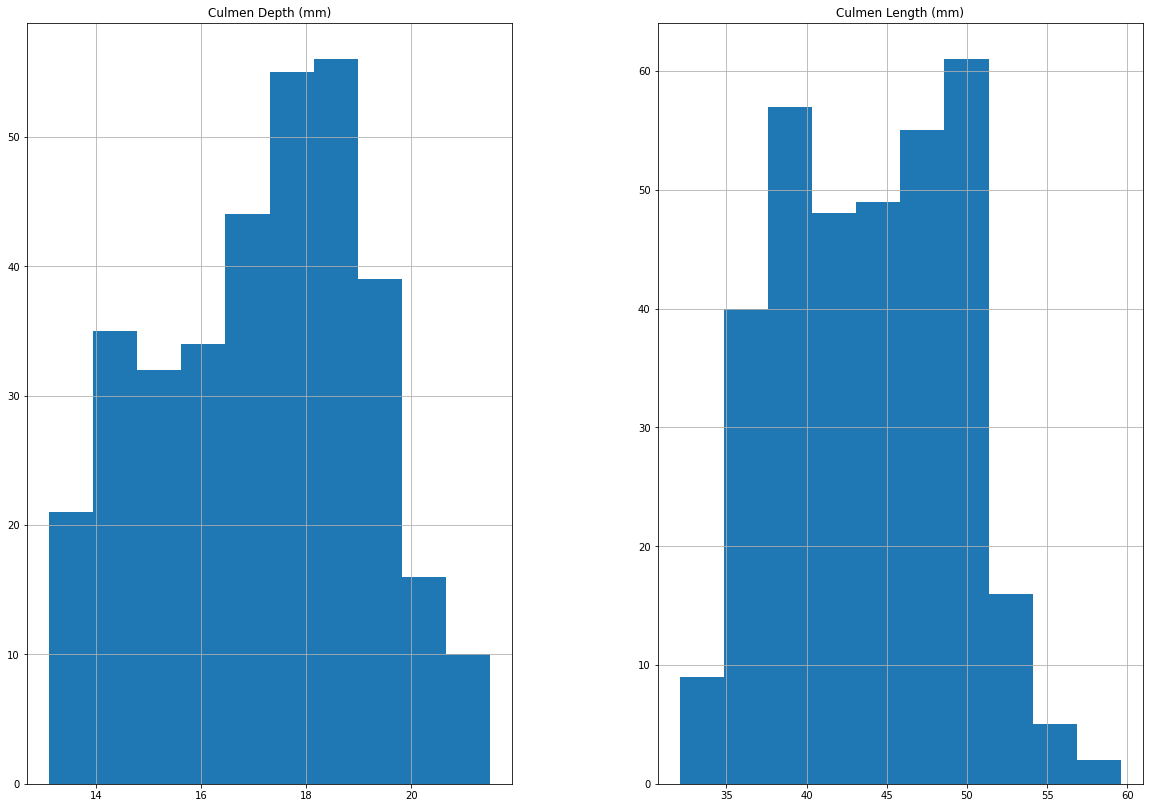

In [14]:
_ = penguins.hist(figsize=(20, 14))

Mostra a distribuição de recursos para cada classe. Dica: use
[`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [15]:
target_column = 'Species'
penguins[target_column].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

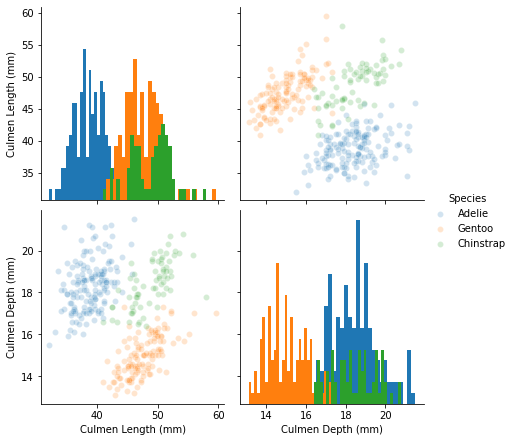

In [17]:
import seaborn as sns

# Vamos representar graficamente um subconjunto de dados para manter o gráfico legível e tornar o
# plotting mais rápido
n_samples_to_plot = 5000
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
_ = sns.pairplot(data=penguins[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

Olhando para essas distribuições, quão difícil você acha que será para classificar
os pinguins usando apenas "profundidade do cúlmen" e "comprimento do cúlmen"?